EDA tasks:

- Overall demographics (age, sex) of HO trends per year

- Overall demographics (age, sex) of commuting data trends in 2019

Start with:
1. Overall demographics (age, sex) of commuting data trends in 2019

Clean Data first!

In [54]:
import pandas as pd
import numpy as np

In [55]:
df_commuting_data = pd.read_csv(r"C:\Users\Olivia\Documents\Weiterbildung\Learning Material\Sus Tainability\Who_Loses_when_HO_ends_project\all_commuting_data_clean_wna.csv")

In [56]:
df_commuting_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8750 entries, 0 to 8749
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Region               8750 non-null   object 
 1   0                    3042 non-null   float64
 2   1-9                  4194 non-null   float64
 3   1-14                 4852 non-null   float64
 4   1+                   5426 non-null   float64
 5   10-14                4372 non-null   float64
 6   15-19                4371 non-null   float64
 7   15-29                4953 non-null   float64
 8   20-29                4566 non-null   float64
 9   30-44                4568 non-null   float64
 10  30-59                4740 non-null   float64
 11  30+                  4868 non-null   float64
 12  45-59                3363 non-null   float64
 13  60+                  3629 non-null   float64
 14  No_response          2411 non-null   float64
 15  sheet_name           8750 non-null   o

1. Determine the null values and how to deal with them


In [57]:
( df_commuting_data == 0 ).any().any()

False

In [58]:
np.where(df_commuting_data == 0)

(array([], dtype=int64), array([], dtype=int64))

In [59]:
#drop columns (total 20 columns) with more than 4 Null values
df_commuting_data.dropna(thresh=16, inplace=True)  # keep rows with at least 16 non-NaNs
# Fill the rest of the NaN values with 0
df_commuting_data.fillna(0, inplace=True)

In [60]:
# the describe() function gives you a good overview
df_commuting_data.describe()

,0,1-9,1-14,1+,10-14,15-19,15-29,20-29,30-44,30-59,30+,45-59,60+,No_response
count,4121.000000,4121.000000,4121.000000,4.121000e+03,4121.000000,4121.000000,4121.000000,4121.000000,4121.000000,4121.000000,4121.000000,4121.000000,4121.000000,4121.000000
mean,926.304295,2986.043921,6050.350886,1.995968e+04,3002.973793,2938.074011,6716.532152,3871.911915,4247.442126,5538.268624,7319.695948,1293.618054,1822.255035,889.917010
std,2927.186129,9543.326512,19288.231435,6.638741e+04,9665.740320,9573.808277,22210.233309,12587.678139,14248.927955,18399.067151,24459.689133,4438.015226,6045.039387,3318.872791
min,0.000000,0.000000,0.000000,2.700000e+01,0.000000,0.000000,10.000000,0.000000,0.000000,4.000000,6.000000,0.000000,0.000000,0.000000
25%,0.000000,106.000000,256.000000,9.430000e+02,132.000000,141.000000,309.000000,177.000000,181.000000,247.000000,308.000000,43.000000,61.000000,0.000000
50%,105.000000,358.000000,788.000000,2.814000e+03,408.000000,407.000000,942.000000,532.000000,562.000000,762.000000,979.000000,151.000000,209.000000,51.000000
75%,451.000000,1598.000000,3212.000000,1.041800e+04,1575.000000,1516.000000,3546.000000,1957.000000,2203.000000,2817.000000,3814.000000,658.000000,936.000000,358.000000
max,50933.000000,149415.000000,312577.000000,1.126473e+06,163406.000000,154198.000000,371153.000000,216955.000000,249768.000000,327746.000000,446836.000000,77978.000000,115053.000000,64365.000000


In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
df_commuting_data.columns

Index(['Region', '0', '1-9', '1-14', '1+', '10-14', '15-19', '15-29', '20-29',
       '30-44', '30-59', '30+', '45-59', '60+', 'No_response', 'sheet_name',
       'education_level', 'urbanisation_degree', 'age_class', 'sex'],
      dtype='object')

In [63]:
df_commuting_data.age_class.unique()

array(['15-34', '15-74', '20-64', '35-49', '50-74'], dtype=object)

In [64]:
df_commuting_data.drop(columns=['1-9', '1+', '10-14', '15-19', '20-29', "30+",
       '30-44', '45-59'], inplace=True)  # drop unneccessary columns as it is not needed for the analysis

In [65]:
df_commuting_data = df_commuting_data[df_commuting_data['age_class'].isin(['15-34', '35-49', '50-74'])]

In [66]:
df_commuting_data

,Region,0,1-14,15-29,30-59,60+,No_response,sheet_name,education_level,urbanisation_degree,age_class,sex
0,European_Union_27_countries_from_2020,6626.0,68421.0,86694.0,69286.0,19278.0,9174.0,Sheet 1,All ISCED 2011 levels,Total,15-34,Female
1,European_Union_29_countries_from_2013-2020,8591.0,82407.0,102439.0,8428.0,25216.0,9874.0,Sheet 1,All ISCED 2011 levels,Total,15-34,Female
2,Euro_area_19_countries_2015-2022,486.0,55149.0,65007.0,50561.0,15275.0,6742.0,Sheet 1,All ISCED 2011 levels,Total,15-34,Female
3,Belgium,305.0,1687.0,2572.0,200.0,624.0,0.0,Sheet 1,All ISCED 2011 levels,Total,15-34,Female
4,Bulgaria,0.0,531.0,149.0,1307.0,149.0,0.0,Sheet 1,All ISCED 2011 levels,Total,15-34,Female
...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Türkiye,266.0,4435.0,5759.0,5771.0,1655.0,0.0,Sheet 114,ISCED 3–4,No response,35-49,Male
8399,Türkiye,136.0,1919.0,1875.0,1325.0,306.0,0.0,Sheet 115,ISCED 3–4,No response,50-74,Male
8434,Türkiye,269.0,4838.0,6308.0,6693.0,2152.0,0.0,Sheet 116,ISCED 5–8,No response,15-34,Male
8539,Türkiye,121.0,4613.0,5455.0,5292.0,1657.0,0.0,Sheet 119,ISCED 5–8,No response,35-49,Male


In [69]:
# Your time interval columns
time_intervals = ['0', '1-14', '15-29', '30-59', '60+', 'No_response']

# Melt the dataframe into long format
df_commuting_long = df_commuting_data.melt(
    id_vars=['Region', 'age_class', 'sex'],
    value_vars=time_intervals,
    var_name='commuting_time',
    value_name='count'
)

In [71]:
df_commuting_long

,Region,age_class,sex,commuting_time,count
0,European_Union_27_countries_from_2020,15-34,Female,0,6626.0
1,European_Union_29_countries_from_2013-2020,15-34,Female,0,8591.0
2,Euro_area_19_countries_2015-2022,15-34,Female,0,486.0
3,Belgium,15-34,Female,0,305.0
4,Bulgaria,15-34,Female,0,0.0
...,...,...,...,...,...
13447,Türkiye,35-49,Male,No_response,0.0
13448,Türkiye,50-74,Male,No_response,0.0
13449,Türkiye,15-34,Male,No_response,0.0
13450,Türkiye,35-49,Male,No_response,0.0


<Figure size 1400x800 with 0 Axes>

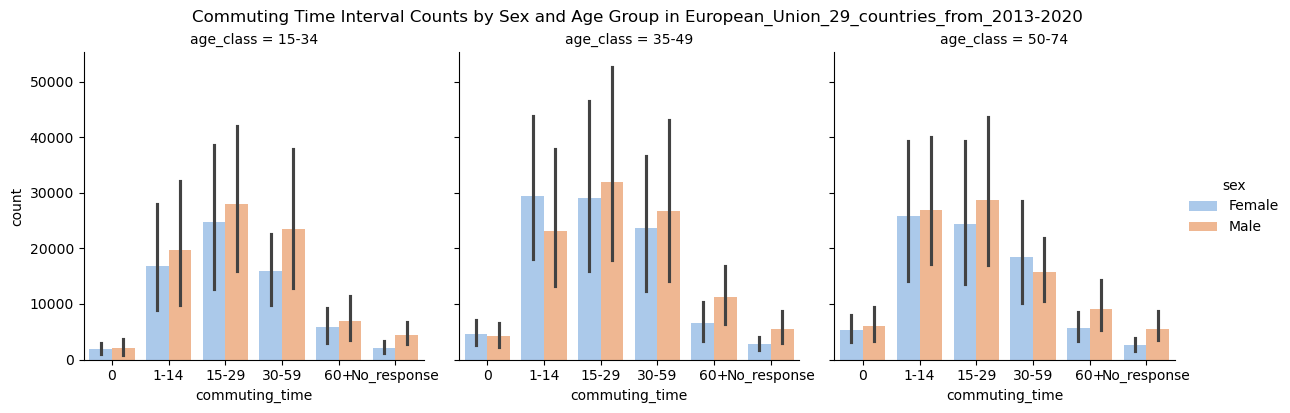

In [97]:
region_name = 'European_Union_29_countries_from_2013-2020'
subset = df_commuting_long[df_commuting_long["Region"] == region_name]

plt.figure(figsize=(14, 8))

sns.catplot(
    data=subset,
    x='commuting_time',
    y='count',
    hue='sex',
    col='age_class',
    kind='bar',
    palette='pastel',
    height=4,
    aspect=1
)

plt.suptitle(f'Commuting Time Interval Counts by Sex and Age Group in {region_name}', y=1.02)
plt.show()

What can we see?

-- in general for all Euro_area_19_countries_2015-2022 we have a higher prevalence of males that take on longer (30+) commuting times

-- Count of females with a low commuting time <30 min for age class 35-49 is higher than male count

-- the biggest fraction of Euro area residents have commuting times between 1-69 minutes to their work

-- HOWEVER: these number vary greatly between countries

<Figure size 1400x800 with 0 Axes>

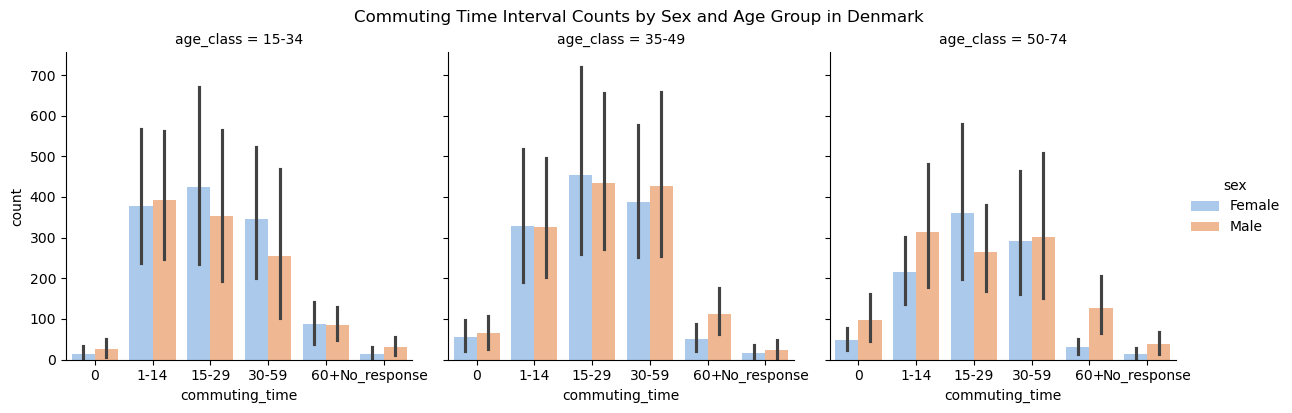

In [91]:
region_name = 'Denmark'
subset = df_commuting_long[df_commuting_long["Region"] == region_name]

plt.figure(figsize=(14, 8))

sns.catplot(
    data=subset,
    x='commuting_time',
    y='count',
    hue='sex',
    col='age_class',
    kind='bar',
    palette='pastel',
    height=4,
    aspect=1
)

plt.suptitle(f'Commuting Time Interval Counts by Sex and Age Group in {region_name}', y=1.02)
plt.show()

<Figure size 1400x800 with 0 Axes>

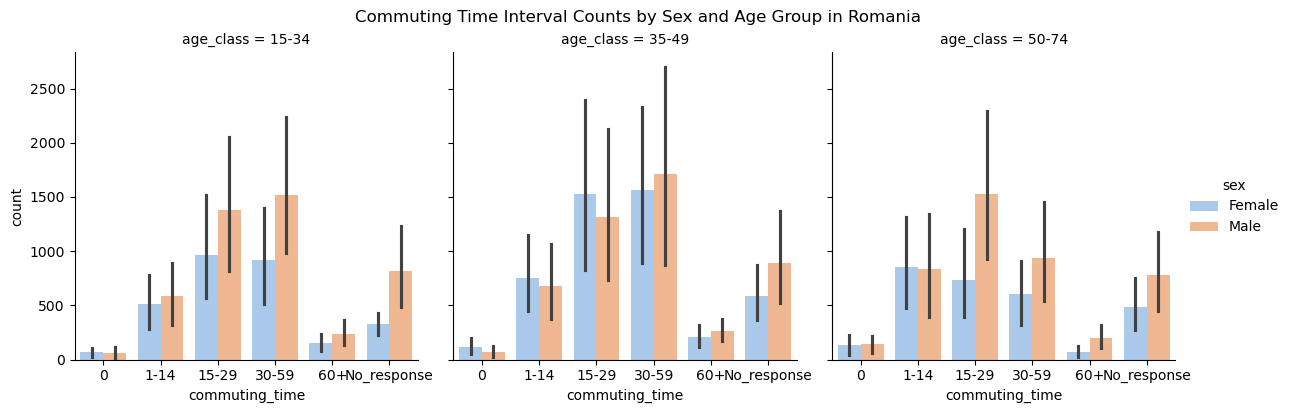

In [95]:
region_name = 'Romania'
subset = df_commuting_long[df_commuting_long["Region"] == region_name]

plt.figure(figsize=(14, 8))

sns.catplot(
    data=subset,
    x='commuting_time',
    y='count',
    hue='sex',
    col='age_class',
    kind='bar',
    palette='pastel',
    height=4,
    aspect=1
)

plt.suptitle(f'Commuting Time Interval Counts by Sex and Age Group in {region_name}', y=1.02)
plt.show()